In [1]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [2]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import vg_pricing as vg
from pars_range import Range, ParsRange

pl.rcParams["figure.figsize"] = (15, 10)

In [3]:
pl.rcParams["figure.figsize"] = (15, 10)


In [4]:
try:
    data, info = dh.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = dh.read_data("SPH2_031612.csv")

In [6]:

data, info = dh.prepare_data(data=data, info=info)

In [7]:
day = 0
rate = .03
q = rate
maturity = info[day].mat / len(info)
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)

In [8]:
nu_range = Range(min=.01, max=1, num=1)
theta_range = Range(min=-.5, max=.5, num=2)
sigma_range = Range(min=.05, max=.25, num=10)

pars = ParsRange(model="vg", center=(1.417, .0718, 0.5), widths=(.4, .02, .1), dots=64)
pars.nu_range = nu_range
pars.theta_range = theta_range
pars.sigma_range = sigma_range
print(pars.nu_range.num)
print(pars.theta_range.num)
print(pars.sigma_range.num)


1
2
10


In [9]:
predicted = []
for params in pars:
    predicted.append(strikes)
    predicted.append(vg.price_vg(pars=params, args=args))
    predicted.append("grey")
# predicted

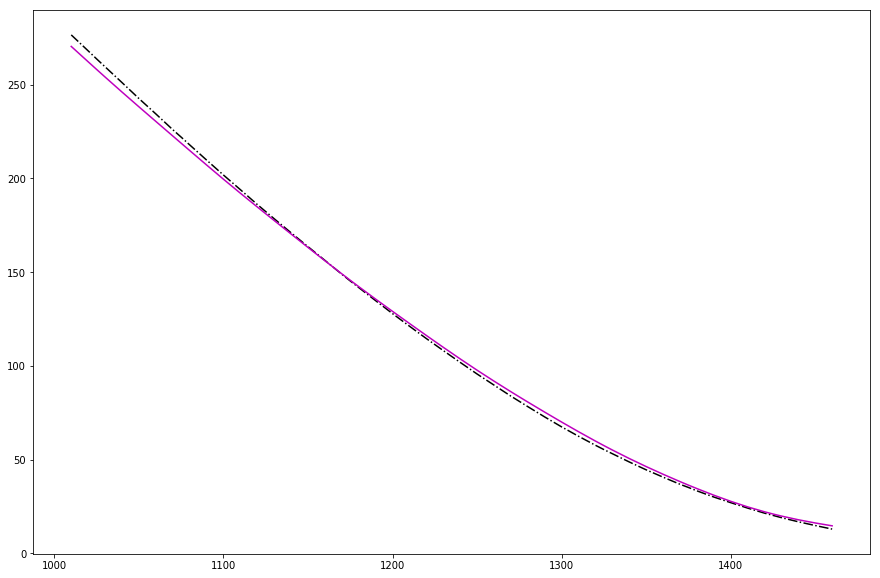

In [10]:
p = pl.plot(  # *predicted,
            strikes, prices, "k-.",
            #strikes, vg.price_vg(pars=(1.9242924, 0.85896911, 0.65368481), args=args), "b",
            strikes, vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args), "m"#,
            #strikes, vg.price_vg(pars=(1.92531088, 0.99771722, 0.28334152), args=args), "g"
)

In [14]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [11]:
import modeling as mo
from structs import EvalArgs


res1 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='MAE', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'], disp=True)
res1

KeyboardInterrupt: 

In [14]:
res2 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='MAR', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'])
res2

     fun: 3.55321287068541e-15
 message: 'Optimization terminated successfully.'
    nfev: 634
     nit: 13
 success: True
       x: array([ 1.92531088,  0.99771722,  0.28334152])

In [15]:
res3 = mo.tune_model(args=EvalArgs.from_tuple(args), metric='RMR', model='vg',
                     prices=data.prices[is_call][day], bounds=mo.par_bounds['vg'])
res3

     fun: 3.55321287068541e-15
 message: 'Optimization terminated successfully.'
    nfev: 634
     nit: 13
 success: True
       x: array([ 1.92531088,  0.99771722,  0.28334152])

In [10]:
print(vg.price_vg(pars=(1.9242924, 0.85896911, 0.65368481), args=args), "b",
      vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args), "m",
      vg.price_vg(pars=(1.92531088, 0.99771722, 0.28334152), args=args), "g")


[ -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15
  -2.56634609e+15  -2.56634609e+15  -2.56634609e+15] b [ 270.29315305  262.17435695  258.13810714  254.

In [16]:
%load_ext autoreload
%autoreload

In [17]:
mo.par_bounds

NameError: name 'mo' is not defined

In [12]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [13]:
import data_helpers as dh
import numpy as np
import sklearn.decomposition as de


dh = reload(dh)


filename = dh.get_filename(model='vg', metric='RMR', best=True)
centers = np.array(list(dh.extract_centers(filename)))
pca = de.PCA(n_components=2).fit(centers)
print(pca.explained_variance_ratio_)
components = pca.components_

[ 0.7044302   0.21144264]


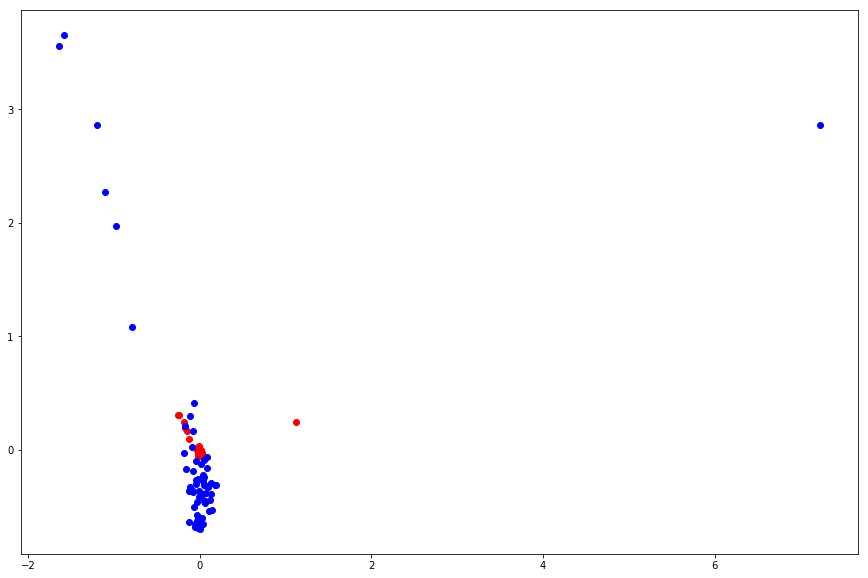

In [14]:
centers_2d = pca.fit_transform(centers)
centers_2d_whitened = de.PCA(n_components=2, whiten=True).fit_transform(centers)
dh.plot_dots(centers_2d, centers_2d_whitened)

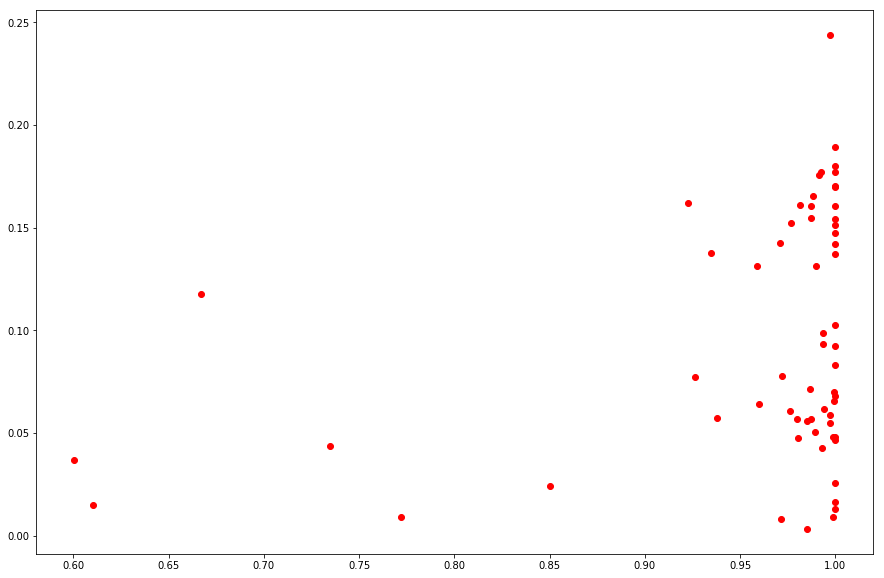

In [15]:
dh.plot_dots(centers[:, [0, 1]])


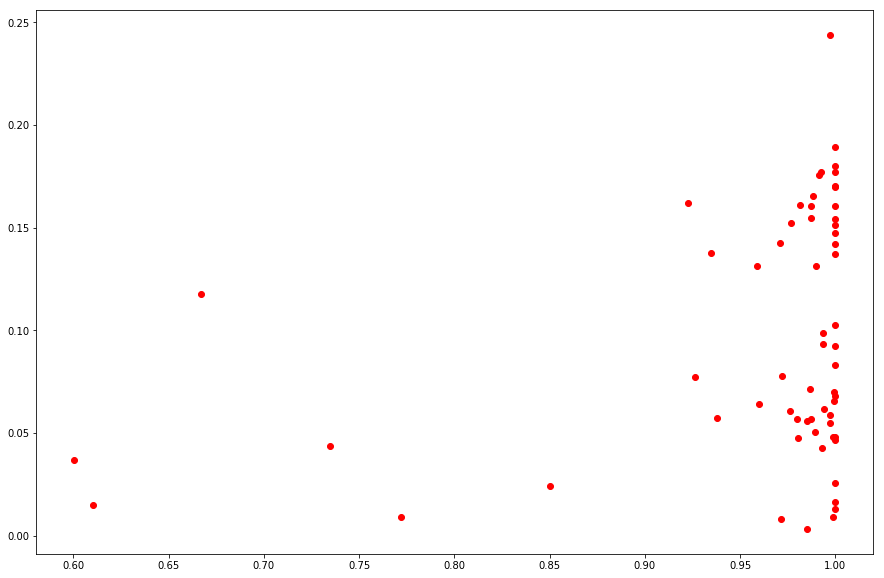

In [16]:
dh.plot_dots(centers[:, [1, 2]])

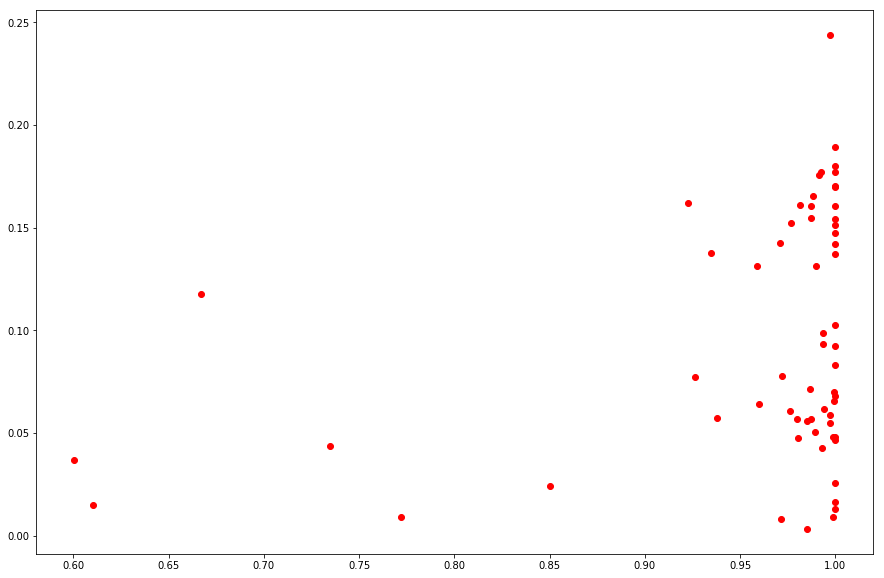

In [17]:
dh.plot_dots(centers[:, [0, 2]])

In [62]:
(centers - np.mean(centers, axis=0) - centers_2d @ components) / centers

array([[  1.38936502e-02,  -4.72000680e-02,  -2.81808315e+00],
       [  9.26550303e-03,  -3.28907308e-02,  -9.45536699e-01],
       [  6.42652064e-03,  -2.12936701e-02,  -5.46399939e-01],
       [  1.76695483e-02,  -5.76642485e-02,  -2.89561097e+01],
       [  5.90595636e-03,  -2.07259449e-02,  -4.39917389e-01],
       [  1.55135566e-02,  -5.13584108e-02,  -4.95280157e+00],
       [  1.07077714e-02,  -3.72450140e-02,  -1.29567899e+00],
       [  7.51864041e-03,  -2.82510132e-02,  -6.31973164e-01],
       [  7.24127644e-03,  -2.73902904e-02,  -6.05442550e-01],
       [  1.03392199e-02,  -4.11531185e-02,  -1.12296631e+00],
       [  8.40764791e-03,  -3.44001302e-02,  -7.45431898e-01],
       [  8.57302222e-03,  -3.39872473e-02,  -7.90872208e-01],
       [  1.66304512e-02,  -6.45906162e-02,  -6.58707269e+00],
       [  1.05733382e-02,  -4.20726687e-02,  -1.18000781e+00],
       [  8.19709908e-03,  -3.07026425e-02,  -7.39868178e-01],
       [  3.88856780e-03,  -1.54164191e-02,  -2.4356652

In [48]:
components @ components.transpose() @ components - components

array([[  8.32667268e-17,   0.00000000e+00,   0.00000000e+00],
       [  2.22044605e-16,  -1.11022302e-16,   2.77555756e-17]])

In [12]:
from integration import integrator

plots = []
hyper_params = [(10, 10), (10, 50), (500, 100), (500, 1000), (10000, 1000)]
for n, upper in hyper_params:
    integrator.n = n
    integrator.upper = upper
    vg = reload(vg)
    prices = vg.price_vg(pars=(1.99975261, -0.0975597, 0.13875441), args=args)
    plots.append(strikes)
    plots.append(prices)


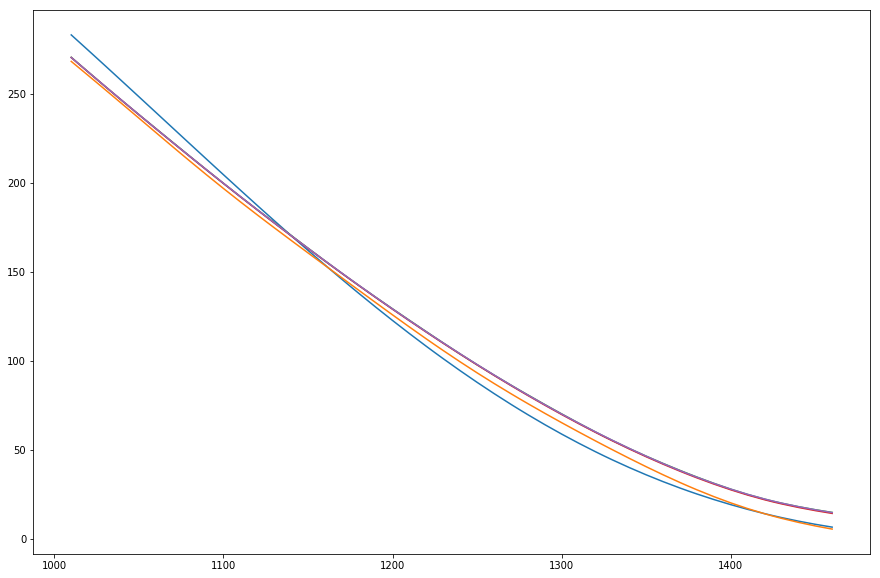

In [13]:
pl.plot(*plots)

In [14]:
plots[1::2]

[array([ 282.94780694,  274.34764766,  270.02406751,  265.6867103 ,
         256.97672297,  248.23037283,  239.46115299,  230.68321154,
         226.29553418,  221.911204  ,  213.16015051,  204.44529866,
         195.78199273,  187.18555022,  182.91715344,  178.67114593,
         170.25370433,  161.94780017,  153.76756788,  145.72661945,
         141.76246936,  137.83797115,  130.11397884,  122.56628162,
         115.20575393,  108.04246545,  104.53770457,  101.0856489 ,
          94.34367502,   87.82403469,   81.53332763,   75.47725726,
          72.53874814,   69.66063143,   64.0873685 ,   58.76050836,
          53.682228  ,   48.85386118,   46.53358726,   44.2759218 ,
          39.94813055,   35.86944449,   32.0380891 ,   28.45159257,
          26.7492121 ,   25.10682182,   22.00002009,   19.12684556,
          16.48241106,   14.06132412,   12.93272267,   11.85772761,
           9.8653403 ,    8.07749738,    6.48719067]),
 array([ 268.07747732,  260.18600661,  256.22502036,  252.250